**<h3> Scaling Data**

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)

**<H2> Deep Learning Model**

Dataframe df will be given as X parameter and Inhospitaldeath case will be given as Y.

In [21]:
X = df
y = temp

In [22]:
print(X.shape , y.shape)

(3999, 37) (3999, 2)


**<h3>Splitting Dataset**

In [23]:
X_train , X_test , y_train , y_test  = train_test_split(X , y , test_size = 0.2)

In [24]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3199, 37) (800, 37) (3199, 2) (800, 2)


Importing necessary files.

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Dropout , BatchNormalization
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
##from keras.optimizers import RMSprop, Adam
from tensorflow.keras.optimizers import RMSprop, Adam

**<h3> Building ANN Model**

In [27]:
model = Sequential()

model.add(Dense(64, input_dim=X_train.shape[1] , activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(196, activation='relu'))
model.add(Dense(196, activation='relu'))

model.add(BatchNormalization())

model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer = Adam(lr = 0.0005),loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2432      
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 196)               25284     
                                                                 
 dense_3 (Dense)             (None, 196)               38612     
                                                                 
 batch_normalization (BatchN  (None, 196)              784       
 ormalization)                                                   
                                                                 
 dense_4 (Dense)             (None, 256)               50432     
                                                        

**<h3> Fitting the model**


In [28]:
history = model.fit(X_train, y_train , epochs=15 , batch_size = 128 , validation_data=(X_test, y_test))

Epoch 1/15
25/25 [==============================] - 2s 28ms/step - loss: 0.4501 - accuracy: 0.8437 - val_loss: 0.5127 - val_accuracy: 0.8600
Epoch 2/15
25/25 [==============================] - 0s 10ms/step - loss: 0.3360 - accuracy: 0.8703 - val_loss: 0.5018 - val_accuracy: 0.8600
Epoch 3/15
25/25 [==============================] - 0s 10ms/step - loss: 0.3222 - accuracy: 0.8721 - val_loss: 0.4855 - val_accuracy: 0.8600
Epoch 4/15
25/25 [==============================] - 0s 9ms/step - loss: 0.3126 - accuracy: 0.8756 - val_loss: 0.5009 - val_accuracy: 0.8600
Epoch 5/15
25/25 [==============================] - 0s 9ms/step - loss: 0.3027 - accuracy: 0.8784 - val_loss: 0.4525 - val_accuracy: 0.8600
Epoch 6/15
25/25 [==============================] - 0s 8ms/step - loss: 0.2995 - accuracy: 0.8803 - val_loss: 0.4674 - val_accuracy: 0.8600
Epoch 7/15
25/25 [==============================] - 0s 10ms/step - loss: 0.2970 - accuracy: 0.8850 - val_loss: 0.4429 - val_accuracy: 0.8600
Epoch 8/15
25/25

**<h3> Evaluating Performance using Accuracy ,Loss and Confusion Matrix**



In [29]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


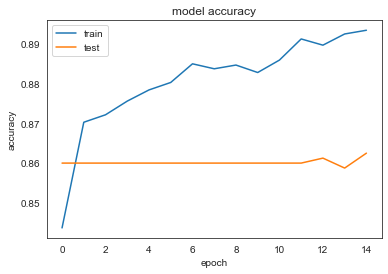

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

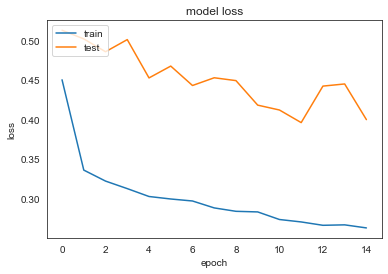

In [31]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
from sklearn.metrics import confusion_matrix
#prediction
pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

In [33]:
cnf_matrix = confusion_matrix(y_true, pred)
print(cnf_matrix)

[[681   7]
 [103   9]]


In [34]:
print(accuracy_score(y_true,pred))

0.8625


**<h2> Summary**

The above model has a loss of 0.27 and an accuracy of about 88%. This is the maximum accuracy it can reach with the given size of data. 

This model can be successfully used for predicting mortality in ICUs but then one should keep in mind that these values are just predicted values and the predictions can be wrong.